In [3]:
import numpy as np
from matplotlib import pyplot as plt


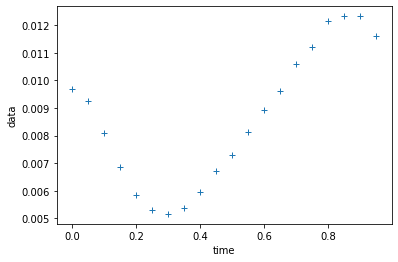

In [156]:
SEED = 222
amp_data = np.load('./data/amp_data.npz')['amp_data']
C = amp_data.shape[0]/21
resi = amp_data.shape[0]%21
amp_data_re = amp_data[:-resi]
amp_data_re = amp_data_re.reshape(int(C),21)
np.random.seed(SEED)
amp_data_shuffle = np.random.permutation(amp_data_re)
def gen_dataset(train,val,test,length):
    X_shuf_train = amp_data_shuffle[:int(amp_data_shuffle.shape[0]*train),:length]
    y_shuf_train = amp_data_shuffle[:int(amp_data_shuffle.shape[0]*train),length:length+1]
    X_shuf_val = amp_data_shuffle[int(amp_data_shuffle.shape[0]*train):int(amp_data_shuffle.shape[0]*(train+val)),:length]
    y_shuf_val = amp_data_shuffle[int(amp_data_shuffle.shape[0]*train):int(amp_data_shuffle.shape[0]*(train+val)),length:length+1]
    X_shuf_test = amp_data_shuffle[int(amp_data_shuffle.shape[0]*test):,:length]
    y_shuf_test = amp_data_shuffle[int(amp_data_shuffle.shape[0]*test):,length:length+1]
    return X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test
X_shuf_train,y_shuf_train,X_shuf_val,y_shuf_val,X_shuf_test,y_shuf_test = gen_dataset(0.7,0.15,0.15,20)
time = np.c_[0:1:1/20]
one_line_data = X_shuf_train[0,:]
one_y = y_shuf_train[0]
time_plot = np.c_[0:1+1/20:1/20]
plt.xlabel('time')
plt.ylabel('data')
plt.plot(time,one_line_data,'+')

In [160]:
def Phi(C,K):    
    temp = np.c_[0:1:1/20]
    cc = temp[20-C:]
    i=0
    phi = np.power(cc,i)
    i=1
    while (i < K):
        temp = np.power(cc,i)
        phi = np.c_[phi,temp]
        i = i+1
    return phi

In [206]:
def make_vv(C,K):
    phi_1 = np.ones([K,1])
    PHI = Phi(C,K)
#     print(np.linalg.pinv(PHI.T@PHI))
    vv = PHI@(np.linalg.pinv(PHI.T@PHI))@phi_1
    return vv

In [200]:
vv_linear = make_vv(20,2)
predict = vv_linear.T@one_line_data
predict

[[ 0.18571429 -0.28571429]
 [-0.28571429  0.60150376]]


array([0.01164936])

In [202]:
vv_quartic = make_vv(20,6)
predict = vv_quartic.T@one_line_data
predict

[[ 8.46798419e-01 -1.46448221e+01  7.88735178e+01 -1.80790514e+02
   1.84980237e+02 -6.95652174e+01]
 [-1.46448221e+01  4.56631372e+02 -3.04437476e+03  7.81126004e+03
  -8.57240952e+03  3.38169037e+03]
 [ 7.88735178e+01 -3.04437476e+03  2.21494908e+04 -5.98130280e+04
   6.79128749e+04 -2.74509804e+04]
 [-1.80790514e+02  7.81126004e+03 -5.98130280e+04  1.66876981e+05
  -1.93892893e+05  7.97355708e+04]
 [ 1.84980237e+02 -8.57240952e+03  6.79128749e+04 -1.93892893e+05
   2.29148396e+05 -9.54816709e+04]
 [-6.95652174e+01  3.38169037e+03 -2.74509804e+04  7.97355708e+04
  -9.54816709e+04  4.02028088e+04]]


array([0.01124827])

In [204]:
def Evaluate(min_C,max_C,min_K,max_K,N):
#   min_C,max_C :from which number to try and to which number to stop
#   min_K,max_K :from which number to try and to which number to stop
#   N: use N diferent context of length C
    temp_square_error = 0
    i,j = min_C,min_K
    outcome = []
    n = 0
    while(i < max_C) :
        X_shuf_train,y_shuf_train = gen_dataset(0.7,0.15,0.15,i)
        print('1C loop over')
        j = min_K
        while(j < max_K) :
            print('1K loop over')
            temp_square_error = 0
            vv = make_vv(i,j)
            n = 0
            while(n < N) :
                one_line_data = X_shuf_train[n,:]
                one_y = y_shuf_train[n]
                try:
                    temp_square_error = temp_square_error+(one_y-vv.T@one_line_data)**2
                except ValueError:
                    print([i,j,temp_square_error])
                    print(outcome)
                n = n+1
            outcome.append([i,j,temp_square_error])
            j = j +1
        i = i +1
    print(outcome)

In [208]:
Evaluate(26,27,2,3,20)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 6)

In [ ]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
import numpy as np
from matplotlib import pyplot as plt
SEED = 444
amp_data = np.load('./data/amp_data.npz')['amp_data']
def gen_dataset(train,val,test,length):
    C = amp_data.shape[0] / (length+1)
    resi = amp_data.shape[0] % (length+1)
    if(resi == 0):
        amp_data_re = amp_data[:]
    else:
        amp_data_re = amp_data[:-resi]
    amp_data_re = amp_data_re.reshape(int(C), length+1)
    np.random.seed(SEED)
    amp_data_shuffle = np.random.permutation(amp_data_re)
    X_shuf_train = amp_data_shuffle[:int(amp_data_shuffle.shape[0]*train),:length]
    y_shuf_train = amp_data_shuffle[:int(amp_data_shuffle.shape[0]*train),length:length+1]
    return X_shuf_train,y_shuf_train

def Phi(C,K):
    temp = np.c_[0:1:1/20]
    cc = temp[20-C:]
    i=0
    phi = np.power(cc,i)
    i=1
    while (i < K):
        temp = np.power(cc,i)
        phi = np.c_[phi,temp]
        i = i+1
    return phi
def make_vv(C,K):
    phi_1 = np.ones([K,1])
    PHI = Phi(C,K)
    vv = PHI@(np.linalg.pinv(PHI.T@PHI))@phi_1
    return vv
def Evaluate(min_C,max_C,min_K,max_K):
#   min_C,max_C :from which number to try and to which number to stop
#   min_K,max_K :from which number to try and to which number to stop
#   N: use N diferent context of length C
    temp_square_error = 0
    i,j = min_C,min_K
    outcome = []
    n = 0
    while(i <= max_C) :
        X_shuf_train,y_shuf_train = gen_dataset(0.7,0.15,0.15,i)
        N = X_shuf_train.shape[0]
        j = min_K
        while(j <= max_K) :
            temp_square_error = 0
            vv = make_vv(i,j)
            n = 0
            while(n < N) :
                one_line_data = X_shuf_train[n,:]
                one_y = y_shuf_train[n]
                try:
                    temp_square_error = temp_square_error+(one_y-vv.T@one_line_data)**2
                except ValueError:
                    print([i,j,temp_square_error])
                    print(outcome)
                n = n+1
            outcome.append([i,j,temp_square_error/N])
            j = j +1
        i = i +1
    min_se = 1000
    fori = 0
    while(fori < len(outcome)):
        if(min_se > outcome[fori][2]):
            min_se = outcome[fori][2]
            print(outcome[fori][0],outcome[fori][1],min_se)
        fori = fori+1
if __name__ == '__main__':
    Evaluate(3,20,2,9)